In [61]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt 


mpl.rc('font',family= 'Malgun Gothic')

In [64]:
# 내가 맡은 
df4 = pd.read_csv('provide_data/02-3_단기체류 외국인 유동인구_SHORT_TERM_FRGN.CSV', encoding='cp949')
df4

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078
...,...,...,...,...,...,...,...
6059039,2021-06-30,24,USA,서귀포시,50130610,중문동,9.2120
6059040,2021-06-30,24,CHN,서귀포시,50130610,중문동,0.6039
6059041,2021-06-30,24,ETC,서귀포시,50130610,중문동,11.5473
6059042,2021-06-30,24,CHN,서귀포시,50130620,예래동,0.2013


In [65]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059044 entries, 0 to 6059043
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   base_date      object 
 1   time           int64  
 2   nationality    object 
 3   city           object 
 4   emd_cd         int64  
 5   emd_nm         object 
 6   visit_pop_cnt  float64
dtypes: float64(1), int64(2), object(4)
memory usage: 323.6+ MB


In [5]:
# base_date = 기준일자 *
# time = 시간
# nationality = 외국인 국적코드
# city = 시 구분
# emd_cd = 행정동 코드
# emd_nm = 행정동명
# visit_pop_cnt = 방문인구 *

In [66]:
# datetime 형식으로 변경 후 새로운 변수로 추가
df4['datetime'] = pd.to_datetime(df4['base_date'])
df4.head()

,base_date,time,nationality,city,emd_cd,emd_nm,visit_pop_cnt,datetime
0,2018-01-01,1,CHN,제주시,50110250,한림읍,66.3170,2018-01-01
1,2018-01-01,1,ETC,제주시,50110250,한림읍,21.1308,2018-01-01
2,2018-01-01,1,HKG,제주시,50110250,한림읍,3.6771,2018-01-01
3,2018-01-01,1,JPN,제주시,50110250,한림읍,5.5962,2018-01-01
4,2018-01-01,1,USA,제주시,50110250,한림읍,3.9078,2018-01-01


In [67]:
# 날짜별 방문인구 분석에 필요한 변수만 추출
temp_df = df4[['datetime', 'visit_pop_cnt']]
temp_df.head()

,datetime,visit_pop_cnt
0,2018-01-01,66.3170
1,2018-01-01,21.1308
2,2018-01-01,3.6771
3,2018-01-01,5.5962
4,2018-01-01,3.9078


In [68]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6059044 entries, 0 to 6059043
Data columns (total 2 columns):
 #   Column         Dtype         
---  ------         -----         
 0   datetime       datetime64[ns]
 1   visit_pop_cnt  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 92.5 MB


In [69]:
temp_df['Year'] = temp_df['datetime'].dt.year
temp_df['Month'] = temp_df['datetime'].dt.month
temp_df['Week'] = temp_df['datetime'].dt.day
temp_df['Day_of_week'] = temp_df['datetime'].dt.day_name()

<ipython-input-69-fa3e907d1741>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Year'] = temp_df['datetime'].dt.year
<ipython-input-69-fa3e907d1741>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['Month'] = temp_df['datetime'].dt.month
<ipython-input-69-fa3e907d1741>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [70]:
temp_df.head()

,datetime,visit_pop_cnt,Year,Month,Week,Day_of_week
0,2018-01-01,66.3170,2018,1,1,Monday
1,2018-01-01,21.1308,2018,1,1,Monday
2,2018-01-01,3.6771,2018,1,1,Monday
3,2018-01-01,5.5962,2018,1,1,Monday
4,2018-01-01,3.9078,2018,1,1,Monday


In [71]:
# 데이터가 크니까 빠르게 그리기 위해 피벗테이블 
p1 = pd.pivot_table(data=temp_df, index='datetime', 
                   values='visit_pop_cnt', aggfunc='sum').reset_index()

p1

,datetime,visit_pop_cnt
0,2018-01-01,145358.8574
1,2018-01-02,144711.6711
2,2018-01-03,142875.5818
3,2018-01-04,123239.1678
4,2018-01-05,110093.5451
...,...,...
1272,2021-06-26,4248.7062
1273,2021-06-27,4910.6828
1274,2021-06-28,4354.8066
1275,2021-06-29,4915.6015


<AxesSubplot:xlabel='datetime', ylabel='visit_pop_cnt'>

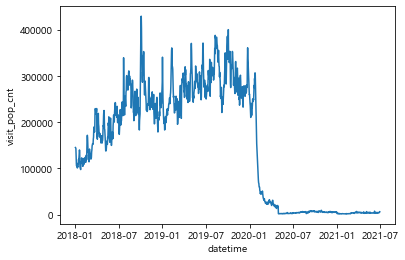

In [12]:
sns.lineplot(data=p1, x='datetime', y='visit_pop_cnt')
# 2020-07 이후 매우 적음(제거 가능...?)

In [13]:
import statsmodels.tsa.api as tsa
from pylab import rcParams

In [14]:
temp_df.head()

,datetime,visit_pop_cnt,Year,Month,Week,Day_of_week
0,2018-01-01,66.3170,2018,1,1,Monday
1,2018-01-01,21.1308,2018,1,1,Monday
2,2018-01-01,3.6771,2018,1,1,Monday
3,2018-01-01,5.5962,2018,1,1,Monday
4,2018-01-01,3.9078,2018,1,1,Monday


In [15]:
# datetime이 index인 경우 가장 좋음 => 아닌 경우 변경 후 사용
df_time = pd.pivot_table(data=temp_df, index='datetime',
                         values='visit_pop_cnt', aggfunc='sum')
df_time.head()

,visit_pop_cnt
datetime,
2018-01-01,145358.8574
2018-01-02,144711.6711
2018-01-03,142875.5818
2018-01-04,123239.1678
2018-01-05,110093.5451


In [16]:
# 일주일별로 구매금액 평균
y = df_time['visit_pop_cnt'].resample('1W').mean()

In [17]:
# 일별로 구매금액 평균
y1 = df_time['visit_pop_cnt'].resample('1D').mean()

# Missing value 확인 => 없음
y1.isnull().sum()

0

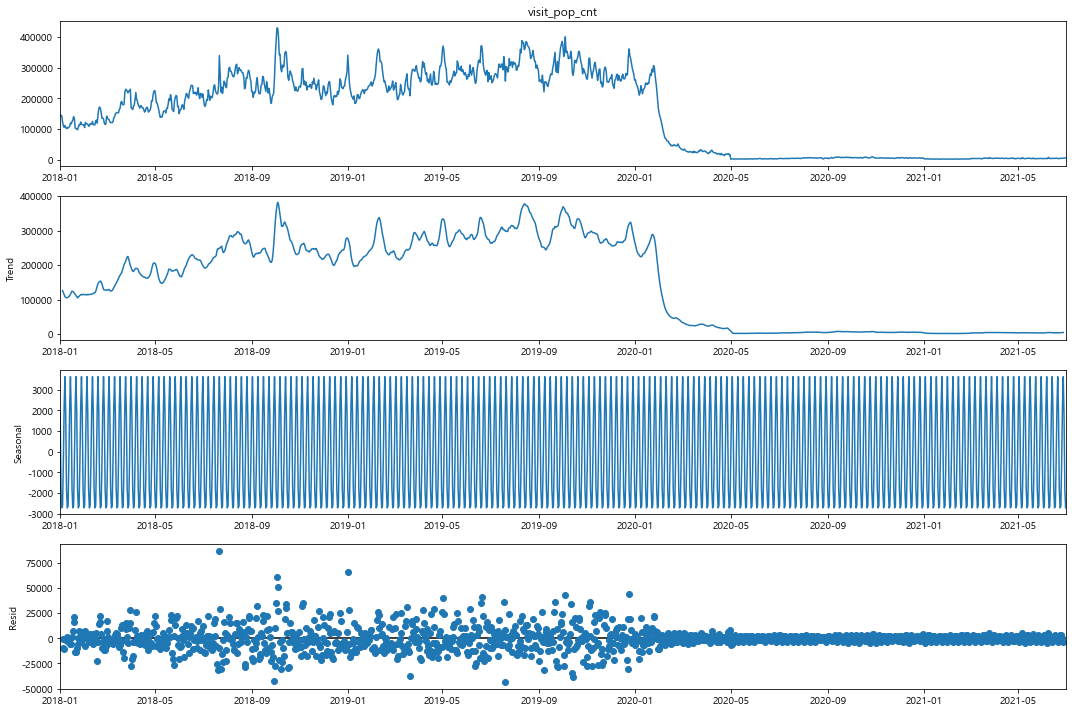

In [18]:
rcParams['figure.figsize'] = 15, 10

# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y1, model='additive')

# 모델 시각화
fig = model_series.plot()
plt.show()

In [ ]:
# 2020-01 이후 급격히 감소 -> 2020-05부터 거의 없음

### ====================8월 6일 실습=======================

In [19]:
temp_df.head()

,datetime,visit_pop_cnt,Year,Month,Week,Day_of_week
0,2018-01-01,66.3170,2018,1,1,Monday
1,2018-01-01,21.1308,2018,1,1,Monday
2,2018-01-01,3.6771,2018,1,1,Monday
3,2018-01-01,5.5962,2018,1,1,Monday
4,2018-01-01,3.9078,2018,1,1,Monday


In [37]:
# 데이터가 크니까 빠르게 그리기 위해 피벗테이블 
p2 = pd.pivot_table(data=temp_df, index='Year', 
                   values='visit_pop_cnt', aggfunc='sum').reset_index()

p2

,Year,visit_pop_cnt
0,2018,7.541730e+07
1,2019,1.035572e+08
2,2020,1.199436e+07
3,2021,5.987402e+05


<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

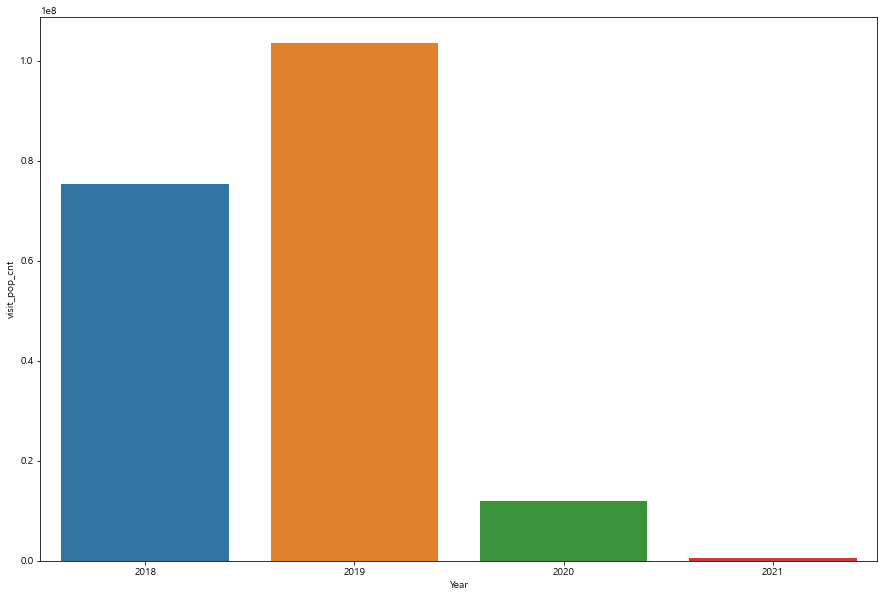

In [38]:
# barplot
# ci='sd': 표준편차 이용해서 그리기
sns.barplot(data=p2, x='Year', y='visit_pop_cnt')

<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

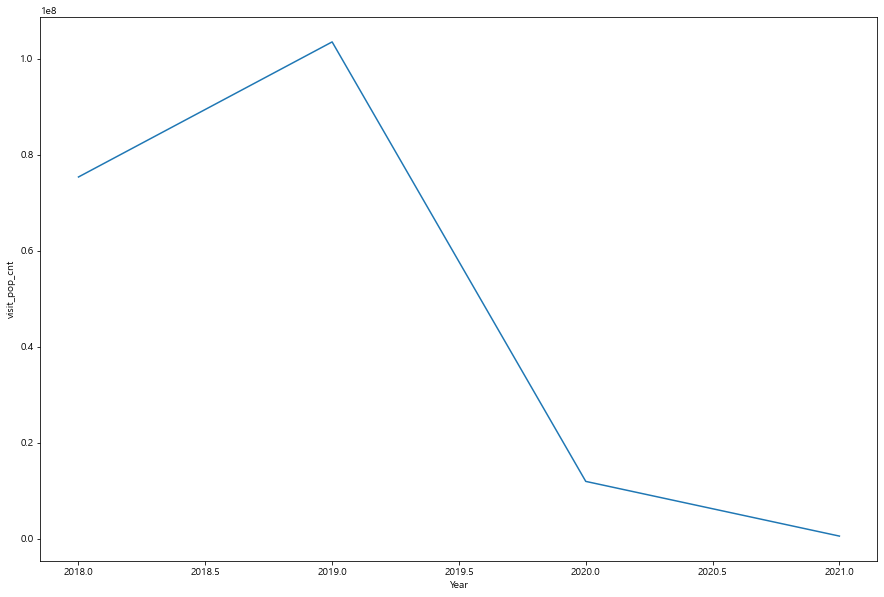

In [40]:
# lineplot
sns.lineplot(data=p2, x='Year', y='visit_pop_cnt')

<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

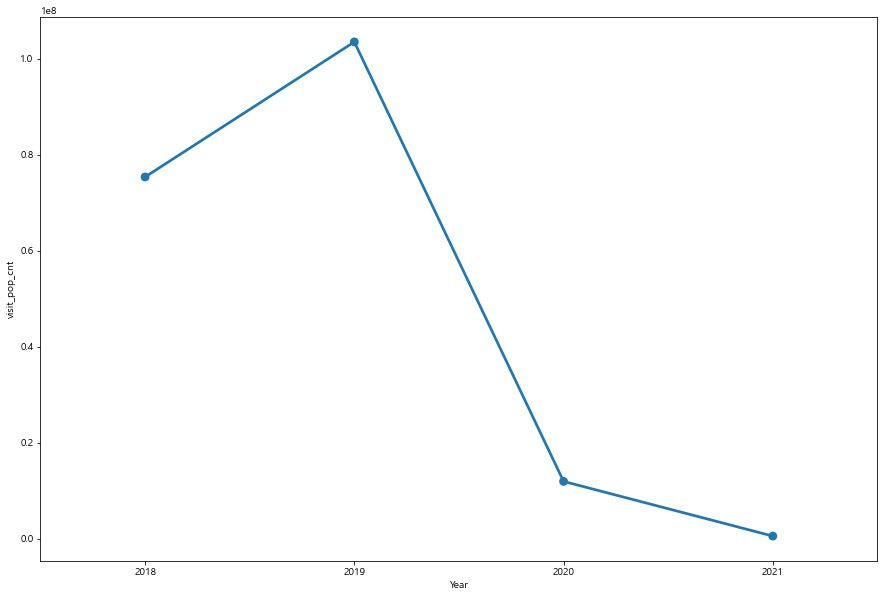

In [41]:
# pointplot
sns.pointplot(data=p2, x='Year', y='visit_pop_cnt')

In [43]:
# 데이터가 크니까 빠르게 그리기 위해 피벗테이블 
p3 = pd.pivot_table(data=temp_df, index=['Year', 'Month'],  
                   values='visit_pop_cnt', aggfunc='sum').reset_index()

p3.head()

,Year,Month,visit_pop_cnt
0,2018,1,3.589096e+06
1,2018,2,3.542827e+06
2,2018,3,5.228215e+06
3,2018,4,5.318488e+06
4,2018,5,5.444136e+06


<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

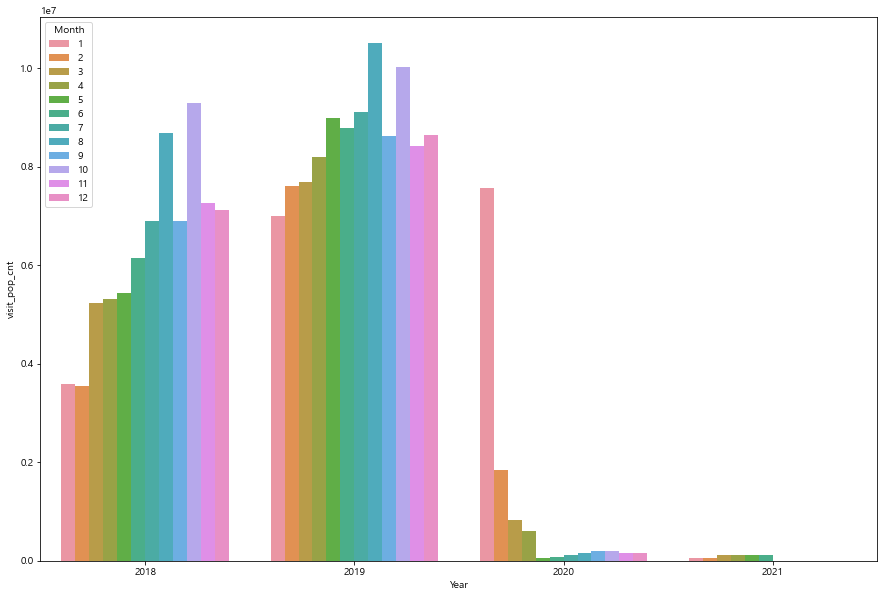

In [44]:
sns.barplot(data=p3, x='Year', y='visit_pop_cnt', hue='Month')

<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

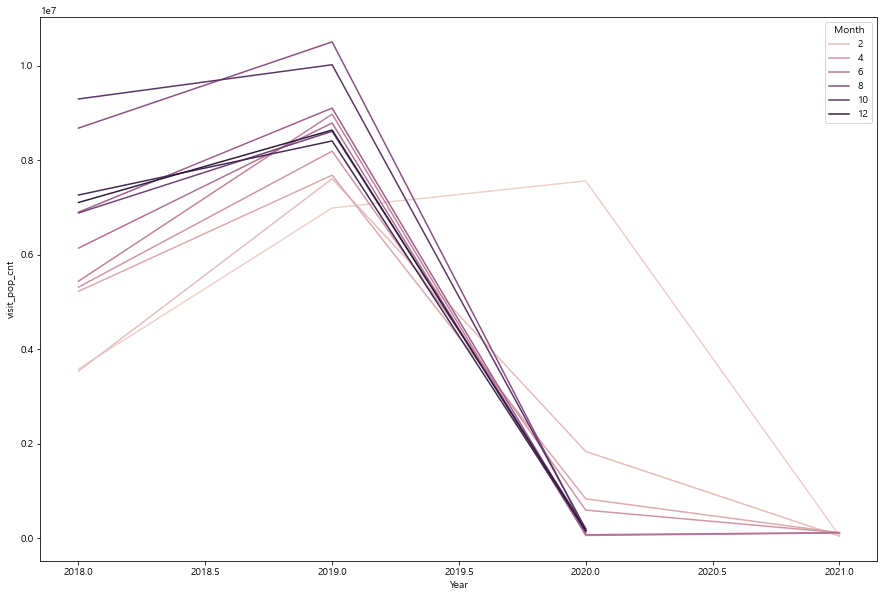

In [49]:
sns.lineplot(data=p3, x='Year', y='visit_pop_cnt', hue='Month')

<AxesSubplot:xlabel='Month', ylabel='visit_pop_cnt'>

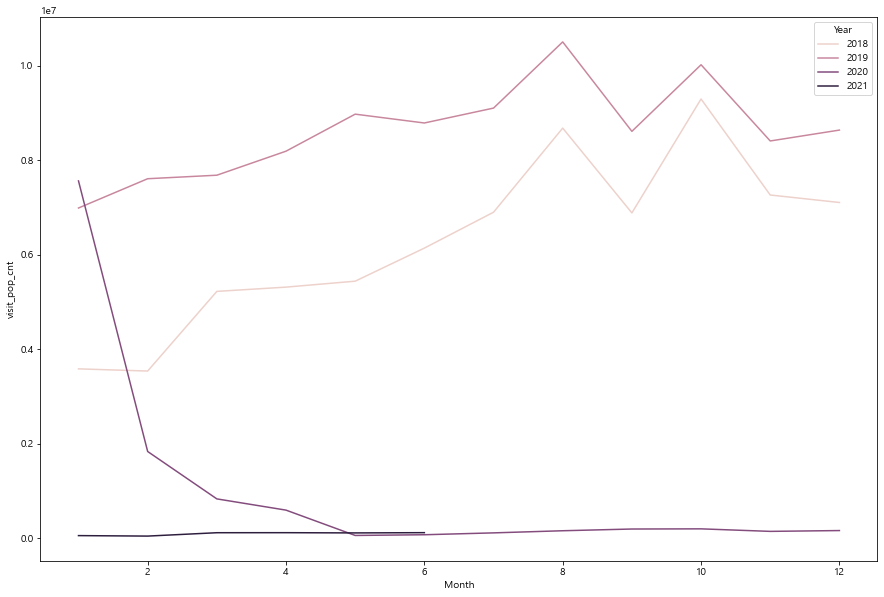

In [50]:
sns.lineplot(data=p3, x='Month', y='visit_pop_cnt', hue='Year')

<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

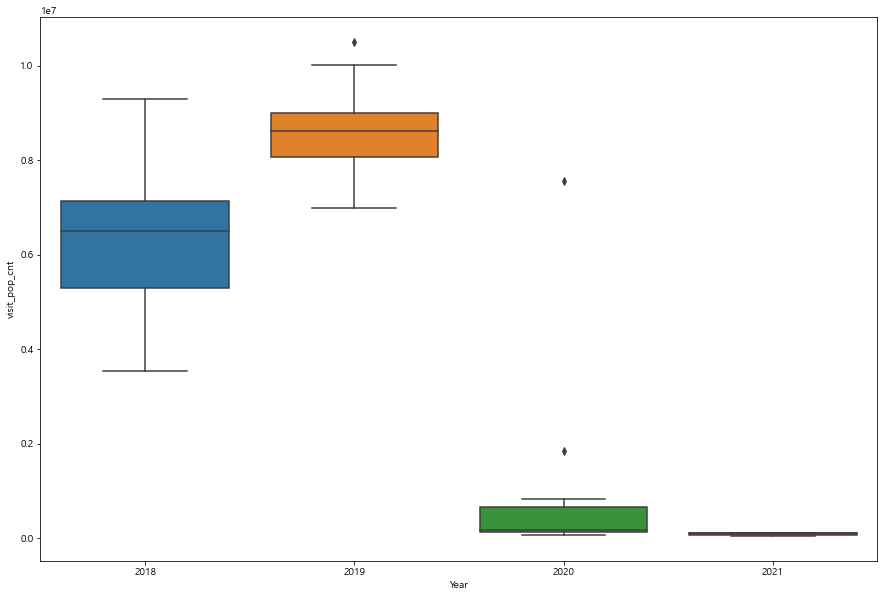

In [51]:
sns.boxplot(data=p3, x='Year', y='visit_pop_cnt')

<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

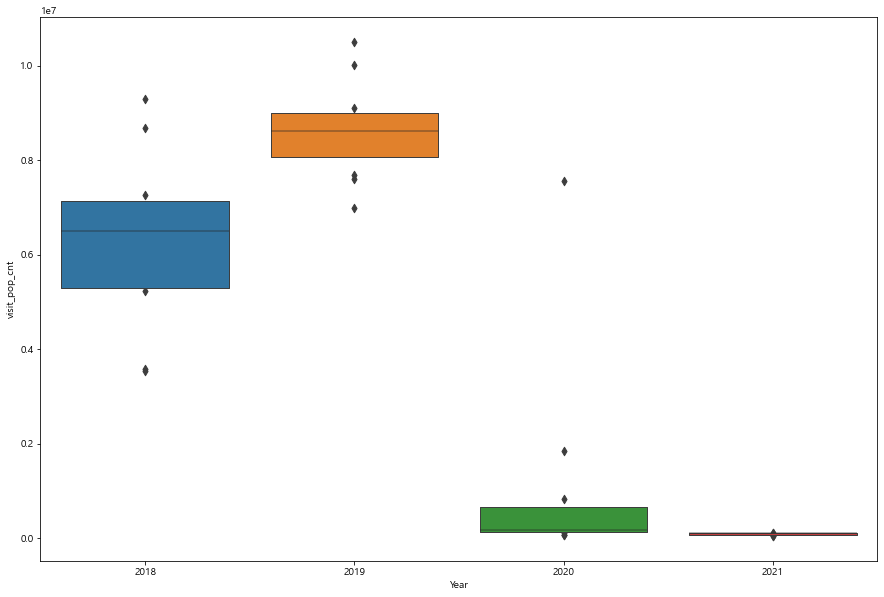

In [52]:
# boxplot 단점을 보완한 그래프
sns.boxenplot(data=p3, x='Year', y='visit_pop_cnt')

<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

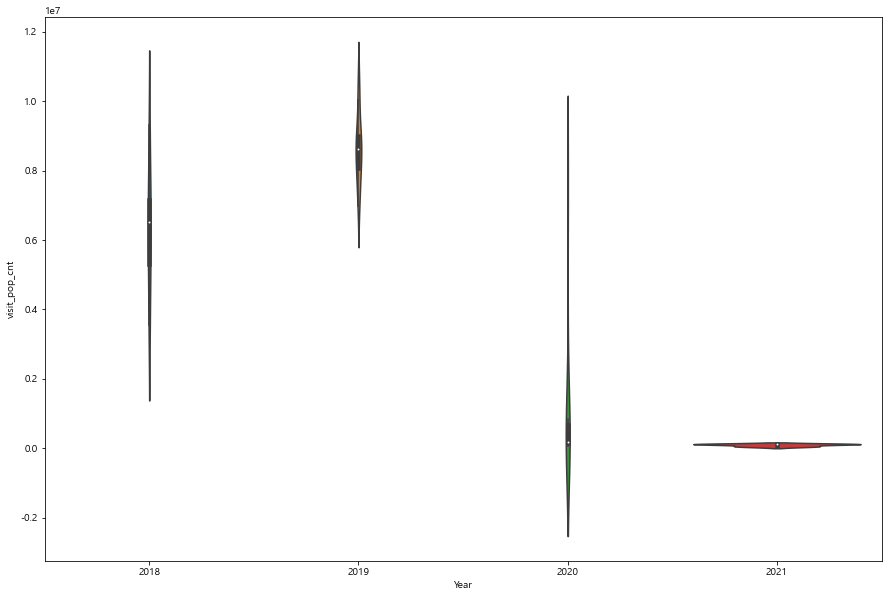

In [53]:
sns.violinplot(data=p3, x='Year', y='visit_pop_cnt')

<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

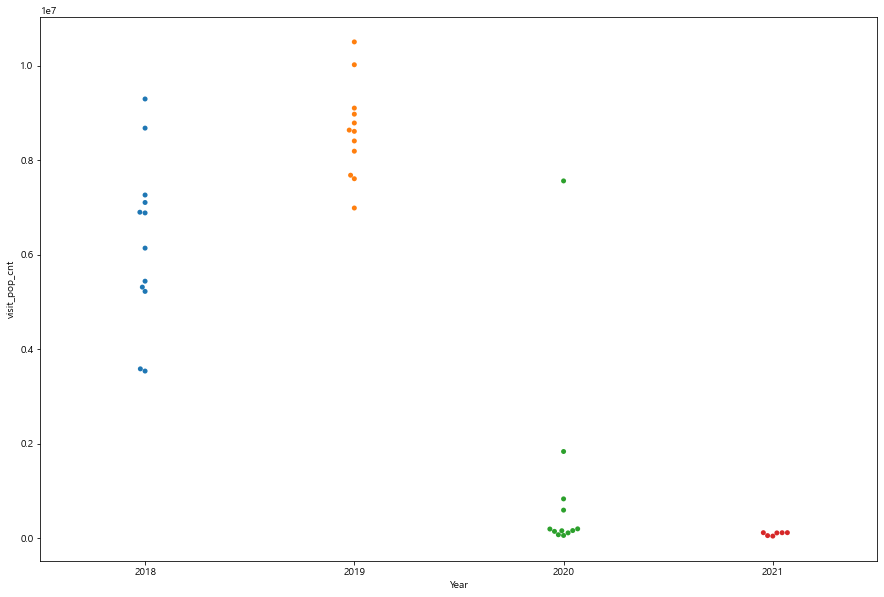

In [54]:
sns.swarmplot(data=p3, x='Year', y='visit_pop_cnt')

<AxesSubplot:xlabel='Year', ylabel='visit_pop_cnt'>

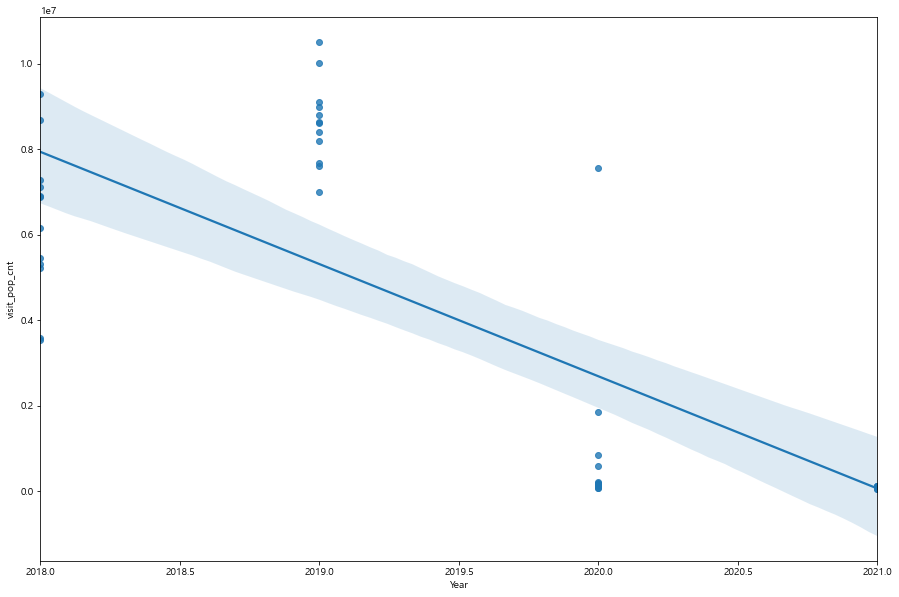

In [58]:
# 회귀 알 수 있는 그래프
sns.regplot(data=p3, x='Year', y='visit_pop_cnt')

<AxesSubplot:xlabel='Month', ylabel='visit_pop_cnt'>

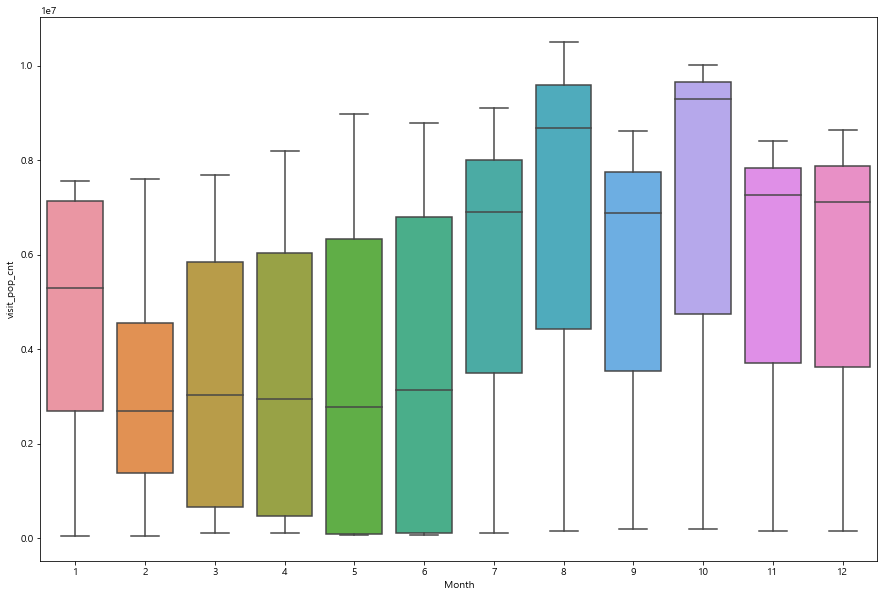

In [55]:
# 월별
sns.boxplot(data=p3, x='Month', y='visit_pop_cnt')

<AxesSubplot:xlabel='Month', ylabel='visit_pop_cnt'>

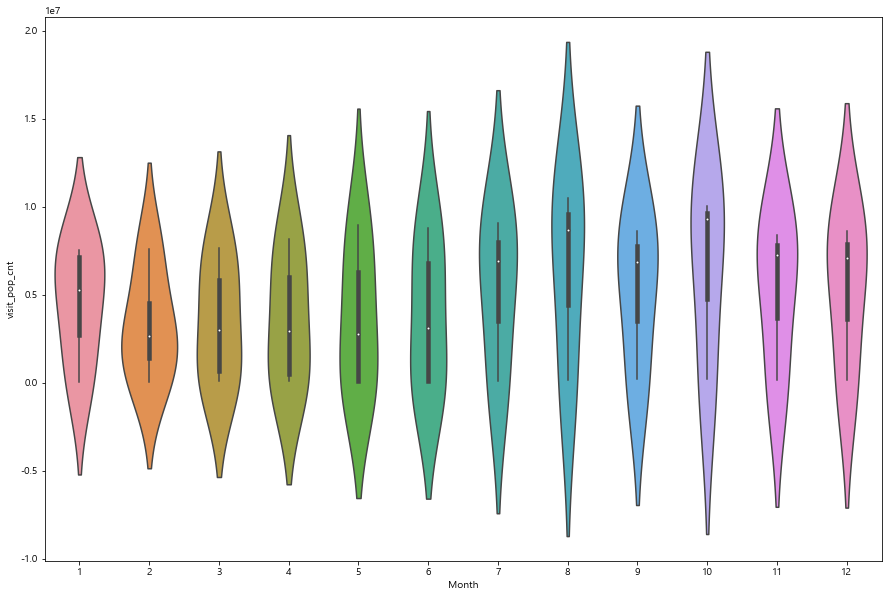

In [56]:
sns.violinplot(data=p3, x='Month', y='visit_pop_cnt')

<AxesSubplot:xlabel='Month', ylabel='visit_pop_cnt'>

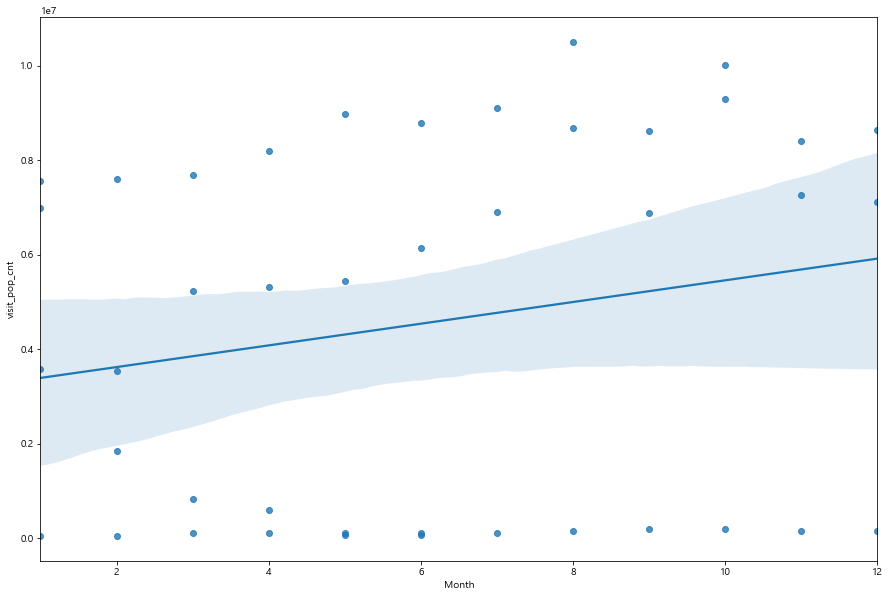

In [59]:
sns.regplot(data=p3, x='Month', y='visit_pop_cnt')

<AxesSubplot:xlabel='Month', ylabel='visit_pop_cnt'>

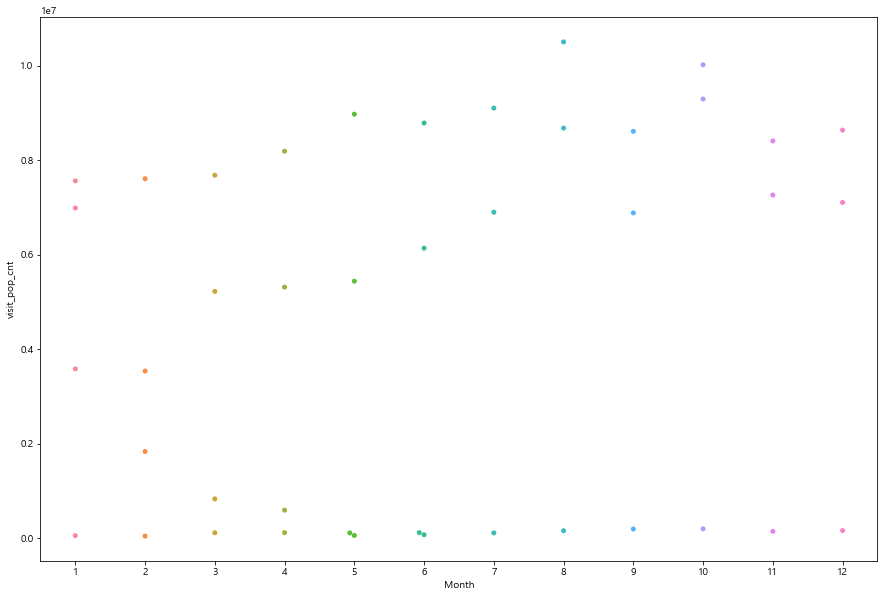

In [60]:
sns.swarmplot(data=p3, x='Month', y='visit_pop_cnt')

### ====================8월 10일 실습=======================

In [74]:
# 위에거 이어서 실습
temp_df.head(20)

,datetime,visit_pop_cnt,Year,Month,Week,Day_of_week
0,2018-01-01,66.3170,2018,1,1,Monday
1,2018-01-01,21.1308,2018,1,1,Monday
2,2018-01-01,3.6771,2018,1,1,Monday
3,2018-01-01,5.5962,2018,1,1,Monday
4,2018-01-01,3.9078,2018,1,1,Monday
5,2018-01-01,123.9840,2018,1,1,Monday
6,2018-01-01,29.0548,2018,1,1,Monday
7,2018-01-01,11.1924,2018,1,1,Monday
8,2018-01-01,7.7220,2018,1,1,Monday
9,2018-01-01,11.8807,2018,1,1,Monday


In [97]:
# 중복이 있으므로 .pivot()은 오류 => .pivot_table() 사용
# ex) 2018-01-01 날짜의 데이터가 여러개임
# pivot_table(aggfunc='mean')이 디폴트


df = temp_df.pivot_table(index='datetime', 
                   values='visit_pop_cnt', aggfunc='sum').reset_index()

df

,datetime,visit_pop_cnt
0,2018-01-01,145358.8574
1,2018-01-02,144711.6711
2,2018-01-03,142875.5818
3,2018-01-04,123239.1678
4,2018-01-05,110093.5451
...,...,...
1272,2021-06-26,4248.7062
1273,2021-06-27,4910.6828
1274,2021-06-28,4354.8066
1275,2021-06-29,4915.6015


In [78]:
df_h = temp_df.pivot_table(index='Month', columns='Year', values='visit_pop_cnt')

<AxesSubplot:xlabel='Year', ylabel='Month'>

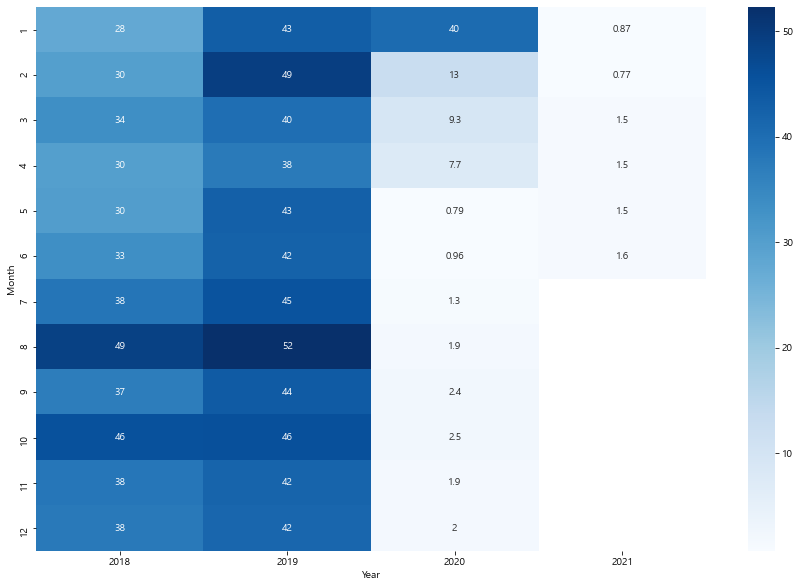

In [83]:
# heatmap
# fmt='.0f' - 숫자 출력 포맷지정
# cmap='Blues' - 색 지정

sns.heatmap(df_h, annot=True, cmap='Blues')

C:\Users\caron\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='visit_pop_cnt', ylabel='Density'>

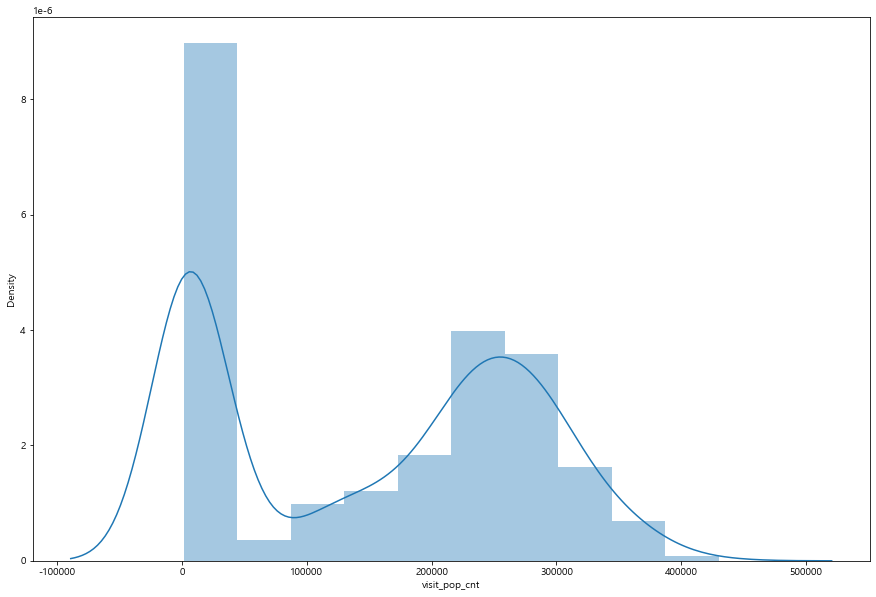

In [98]:
# distplot - 데이터 너무 커서 안그려짐.. -> 피벗테이블 만든걸로

sns.distplot(df['visit_pop_cnt'])

In [102]:
# pairplot - 데이터 너무 커서 안 그려져서 아주 작은 데이터로 실습만 진행..
from sklearn.model_selection import train_test_split

train_df, valid_df = train_test_split(temp_df, test_size=0.9995, 
                                                      random_state=1)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3029 entries, 2614757 to 4322341
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   datetime       3029 non-null   datetime64[ns]
 1   visit_pop_cnt  3029 non-null   float64       
 2   Year           3029 non-null   int64         
 3   Month          3029 non-null   int64         
 4   Week           3029 non-null   int64         
 5   Day_of_week    3029 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 165.6+ KB


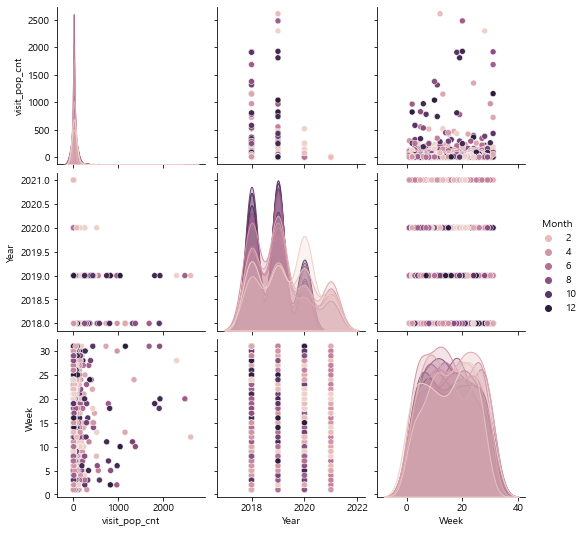

In [103]:
sns.pairplot(data=train_df, hue='Month')

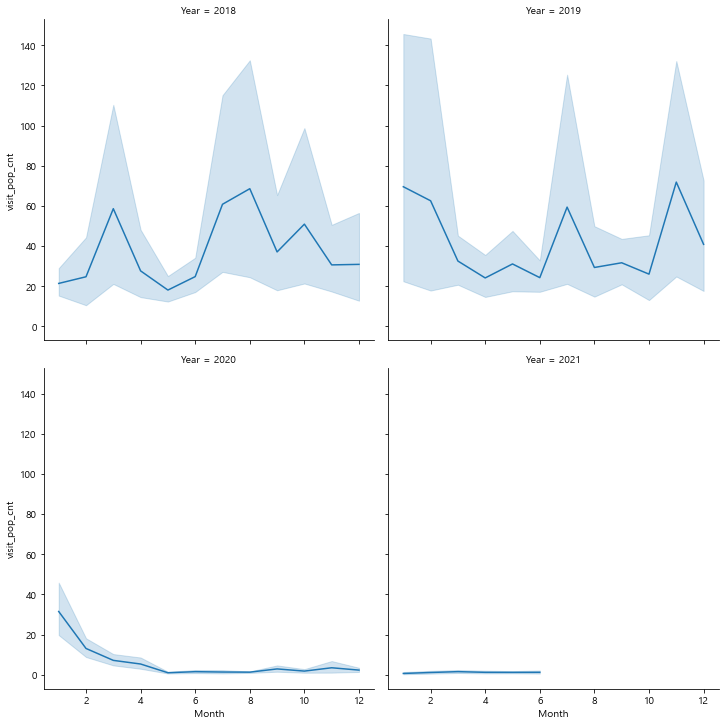

In [109]:
# relplot
# kind='line'
# hue 사용가능
# col='Year': 지정한 컬럼별로 그래프 그림
# col_wrap=2: 지정한 숫자만큼 한 행에 그래프 그림

sns.relplot(data=train_df, x='Month', y='visit_pop_cnt', 
            kind='line', col='Year', col_wrap=2)

In [ ]:
# <기술통계>
# 수치형 -> 통계량(평균, 중앙값, 편차, ...),히스토그램, 상자그림
# 범주형 -> 히스토그램

# <상관관계>
# 주의할 점: 
# 1) 수치형-수치형: 상관계수
# 2) 범주형-범주형: pivot-table
# 3) 범주형-수치형: 수치형(그룹화) -> pivot-table

# 상관관계가 크면 
# 수치형: plot(점그래프)
# 범주형: 조건부확률 느낌으로다가, 각 범주별로 상관있어보이는 변수 분포 확인 (그냥 관계가 있나 없나)

# 동별 특징!!!!


# (~20일) 시계열지식(16,17,18 시계열부분 - 읽어오기)

# 20일~31일: 중간점검: 우리가 이 데이터를 어떻게 사용할지
# X: ~~~~~
# y:

# 음식물 쓰레기 배출양(수치) 예측 -> 변환 X

# X: 변수를 어떻게 전처리했고, 왜 그렇게 했고
# 그래서 우리는 앞으로 ~~모델을 쓸거고
# 그리고 ~~식으로 분석을 해보려고 한다


# 데이터특징, 생각해볼만한거, 나눠보면 어떨까?